# Data Analysis For Hospital Patient Safety

## Contents

toc

## 1. Data Collection

In [1]:
# Libraries
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'


/Users/stathis/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
#Load Data
sismanoglio = pd.read_csv('../Data/Sismanoglio.csv')
evangelismos = pd.read_csv('../Data/Evagelismos.csv')
genimatas = pd.read_csv('../Data/Genimatas.csv')
thriasio = pd.read_csv('../Data/Thriasio.csv')
mpenakio = pd.read_csv('../Data/Mpenakio.csv')

frames = [sismanoglio,evangelismos,genimatas,thriasio,mpenakio]

hospitals = pd.concat(frames)
hospitals = hospitals.reset_index()


In [3]:
#Shape of Data
print('sismanoglio has', sismanoglio.shape[0], 'rows/answers and ',sismanoglio.shape[1], 'columns/questios')
print('evangelismos has', evangelismos.shape[0], 'rows/answers and ',evangelismos.shape[1], 'columns/questios')
print('genimatas has', genimatas.shape[0], 'rows/answers and ',genimatas.shape[1], 'columns/questios')
print('thriasio has', thriasio.shape[0], 'rows/answers and ',thriasio.shape[1], 'columns/questios')
print('mpenakio has', mpenakio.shape[0], 'rows/answers and ',mpenakio.shape[1], 'columns/questios')


sismanoglio has 18 rows/answers and  60 columns/questios
evangelismos has 82 rows/answers and  60 columns/questios
genimatas has 86 rows/answers and  60 columns/questios
thriasio has 36 rows/answers and  60 columns/questios
mpenakio has 22 rows/answers and  60 columns/questios


In [4]:
print('hospitlas have', hospitals.shape[0], 'rows/answers and ',hospitals.shape[1], 'columns/questios')

hospitlas have 244 rows/answers and  62 columns/questios


## 2. Data cleaning

In [5]:
#Drop irrelevant coumns
hospitals.drop("Χρονική σήμανση", axis=1, inplace=True)

%store hospitals


Stored 'hospitals' (DataFrame)


In [6]:
#print all questions
for index, item in enumerate(hospitals.columns, start=0):  
    print(index," ", item)

0   index
1   Σε ποιο Εργασιακό Περιβάλλον /Τομέα/ Μονάδα εργάζεστε;
2   Σε ποιο τμήμα του Παθολογικού Τομέα εργάζεστε;
3   Σε ποιο τμήμα του Χειρουργικού Τομέα εργάζεστε;
4   Σε ποιο τμήμα του Εργαστηριακού Τομέα εργάζεστε;
5   Παρακαλώ γράψτε το όνομα του Τομέα που εργάζεστε.
6   1. Οι εργαζόμενοι υποστηρίζουν ο ένας τον άλλον.
7   2. Υπάρχει επαρκές προσωπικό για τη διεκπεραίωση της εργασίας.
8   3. Όταν υπάρχει μεγάλος όγκος εργασίας που πρέπει να γίνει άμεσα, το προσωπικό εργάζεται ομαδικά για την ολοκλήρωση της.
9   4. Υπάρχει σεβασμός ανάμεσα στους εργαζομένους.
10   5. Το προσωπικό εργάζεται περισσότερες ώρες από αυτές που διασφαλίζουν ασφαλή φροντίδα για τον ασθενή.
11   6. Το προσωπικό εργάζεται δυναμικά για τη βελτίωση της ασφάλειας του ασθενούς.
12   7. Αξιοποιείται περισσότερο προσωρινό προσωπικό από αυτό που διασφαλίζει την ασφαλή φροντίδα του ασθενούς.
13   8. Το προσωπικό αισθάνεται ότι τα λάθη του μπορεί να χρησιμοποιηθούν εναντίον του. 
14   9. Τα λάθη οδήγησαν σε θετ

In [7]:
hospitals_jobField  = hospitals.iloc[: , :5]
hospitals_personalInfo = hospitals.iloc[:, 49:58]
hospitals_questions = hospitals.iloc[:, 5:49]

%store hospitals_personalInfo

Stored 'hospitals_personalInfo' (DataFrame)


#### Clean Personal Info

In [8]:
hospitals_personalInfo.dropna()
hospitals_personalInfo

,Τους τελευταίους 12 μήνες πόσα δυσμενή συμβάντα έχετε αναφέρει; (Αναφέρετε έναν αριθμό),1. Φύλο:,2. Ηλικία…,3α. Ποια είναι η βασική σας εκπαίδευση;,3β. Άλλες σπουδές:,7. Πόσο χρονικό διάστημα εργάζεστε στο συγκεκριμένο Νοσοκομείο;,8. Πόσο χρονικό διάστημα εργάζεστε στη συγκεκριμένη μονάδα ?,9. Συνήθως πόσες ώρες την εβδομάδα εργάζεστε στο συγκεκριμένο Νοσοκομείο; …,10. Τι θέση κατέχετε στο νοσοκομείο που εργάζεστε;
0,4,Γυναίκα,23,3. Πανεπιστημιακή (Π.Ε.),3. Διδακτορικό δίπλωμα,23,12,23,4. ΤΕ Νοσηλευτής
1,NaN,Γυναίκα,45,3. Πανεπιστημιακή (Π.Ε.),2. Μεταπτυχιακές σπουδές,23,NaN,12,4. ΤΕ Νοσηλευτής
2,10,Άνδρας,55,2. Τεχνολογική (Τ.Ε.),3. Διδακτορικό δίπλωμα,33,3,60,4. ΤΕ Νοσηλευτής
3,NaN,Άνδρας,61,3. Πανεπιστημιακή (Π.Ε.),3. Διδακτορικό δίπλωμα,30 έτη,30 έτη,NaN,NaN
4,2,Άνδρας,50,2. Τεχνολογική (Τ.Ε.),2. Μεταπτυχιακές σπουδές,25,9 ΧΡΟΝΙΑ1998-2007 ΚΑΙ 2 2020-2022,41,4. ΤΕ Νοσηλευτής
...,...,...,...,...,...,...,...,...,...
239,0.0,Γυναίκα,47,2. Τεχνολογική (Τ.Ε.),2. Μεταπτυχιακές σπουδές,25,3,40,4. ΤΕ Νοσηλευτής
240,NaN,Άνδρας,56,2. Τεχνολογική (Τ.Ε.),NaN,31 ΕΤΗ,1 ΕΤΟΣ,40,NaN
241,2.0,Άνδρας,40,3. Πανεπιστημιακή (Π.Ε.),2. Μεταπτυχιακές σπουδές,"5,5 έτη","5,5 έτη",58,2. Ειδικός ιατρός
242,2.0,Γυναίκα,45,3. Πανεπιστημιακή (Π.Ε.),2. Μεταπτυχιακές σπουδές,20,10,42,3. ΠΕ Νοσηλευτής


In [9]:
#print all questions
#for index, item in enumerate(hospitals_questions, start=0):  
#    print(index," ", item)

## 3. Split Questions to 12 categories according to HSOPSC and check for internal consistency internal consistency

In [10]:
#helper functions

def my_reverse(table, q):
    for index in range(len(table)):
        if table[q].iloc[index] == 1:
            table[q].iloc[index] = 5
        elif table[q].iloc[index] == 2:
            table[q].iloc[index] = 4
        elif table[q].iloc[index] == 4:
            table[q].iloc[index] = 2
        elif table[q].iloc[index] == 5:
            table[q].iloc[index] = 1
    return table

#### Parameter of patient safety 1 : Open Communication

In [11]:
g4 = '4. Το προσωπικό μπορεί ελεύθερα να αμφισβητήσει τις αποφάσεις ή τις ενέργειες των ανωτέρων του.'
g2 = '2. Το προσωπικό μιλάει ελεύθερα όταν διαπιστώσει κάτι που επιδρά αρνητικά στη φροντίδα υγείας του ασθενούς.'
g6 = '6. Το προσωπικό φοβάται να ρωτήσει, όταν κάτι δεν φαίνεται σωστό.'

open_communication = hospitals_questions[:][[g4,g2,g6]]



In [12]:
#reverse question g6
open_communication = my_reverse(open_communication, g6)
%store open_communication

Stored 'open_communication' (DataFrame)


In [13]:
#calculate cronabachs alpha
ca = pg.cronbach_alpha(data=open_communication)
print("Cronabachs alpha for parameter 1: ",ca[0])

Cronabachs alpha for parameter 1:  0.6743414056090667


#### Parameter of patient safety 2 


In [14]:
g1 = '1. Γίνεται συστηματική αξιολόγηση των αλλαγών που τίθενται σε εφαρμογή, βάσει δυσμενών συμβάντων που έχουν αναφερθεί. '
g3 = '3. Το προσωπικό ενημερώνεται συχνά για τα δυσμενή συμβάντα που λαμβάνουν χώρα.'
g5 = '5. Το προσωπικό συζητά τρόπους πρόληψης δυσμενών συμβάντων ώστε να μην επαναληφθούν.'


parameter_2 = hospitals_questions[:][[g1,g3,g5]]
%store parameter_2

Stored 'parameter_2' (DataFrame)


In [15]:
#calculate cronabachs alpha
ca = pg.cronbach_alpha(data=parameter_2)
print("Cronabachs alpha for parameter 1: ",ca[0])

Cronabachs alpha for parameter 1:  0.7640560884558483


#### Parameter of patient safety 3

In [16]:
a6 = '6. Το προσωπικό εργάζεται δυναμικά για τη βελτίωση της ασφάλειας του ασθενούς.'
a9 = '9. Τα λάθη οδήγησαν σε θετικές αλλαγές.'
a13 = '13. Όταν γίνονται αλλαγές για τη βελτίωση της ασφάλειας του ασθενούς, αξιολογείται η αποτελεσματικότητά τους.'

parameter_3 = hospitals_questions[:][[a6,a9,a13]]
%store parameter_3

Stored 'parameter_3' (DataFrame)


In [17]:
#calculate cronabachs alpha
ca = pg.cronbach_alpha(data=parameter_3)
print("Cronabachs alpha for parameter 1: ",ca[0])

Cronabachs alpha for parameter 1:  0.6706998921472327


#### Parameter of patient safety 4

In [18]:
a1 = '1. Οι εργαζόμενοι υποστηρίζουν ο ένας τον άλλον.'
a3 = '3. Όταν υπάρχει μεγάλος όγκος εργασίας που πρέπει να γίνει άμεσα, το προσωπικό εργάζεται ομαδικά για την ολοκλήρωση της.'
a4 = '4. Υπάρχει σεβασμός ανάμεσα στους εργαζομένους.'
a11 = '11. Όταν υπάρχει μεγάλος φόρτος εργασίας παρέχεται βοήθεια από άλλες Μονάδες.'

parameter_4 = hospitals_questions[:][[a1,a3,a4,a11]]
%store parameter_4

Stored 'parameter_4' (DataFrame)


In [19]:
#calculate cronabachs alpha
ca = pg.cronbach_alpha(data=parameter_4)
print("Cronabachs alpha for parameter 1: ",ca[0])

Cronabachs alpha for parameter 1:  0.6407142720453203


#### Parameter of patient safety 5

In [20]:
a8 = '8. Το προσωπικό αισθάνεται ότι τα λάθη του μπορεί να χρησιμοποιηθούν εναντίον του. '
a12 = '12. Όταν δηλώνεται ένα δυσμενές συμβάν, υπάρχει η αίσθηση ότι καταγράφεται το άτομο και όχι το καθαυτό συμβάν.'
a16 = '16. Το προσωπικό ανησυχεί ότι τα λάθη του καταγράφονται στο προσωπικό του φάκελο.'

parameter_5 = hospitals_questions[:][[a8,a12,a16]]
%store parameter_5

Stored 'parameter_5' (DataFrame)


In [21]:
#reverse question a8 a12 a16
pd.options.mode.chained_assignment = None  # default='warn'
parameter_5 = my_reverse(parameter_5, a8)
parameter_5 = my_reverse(parameter_5, a12)
parameter_5 = my_reverse(parameter_5, a16)

%store parameter_5

Stored 'parameter_5' (DataFrame)


In [22]:
#calculate cronabachs alpha
ca = pg.cronbach_alpha(data=parameter_5)
print("Cronabachs alpha for parameter 1: ",ca[0])

Cronabachs alpha for parameter 1:  0.6354050094932764


#### Parameter of patient safety 6

In [23]:
b1 = '1. Επιβραβεύει το προσωπικό με καλά λόγια όταν τηρούνται οι διαδικασίες ασφαλούς φροντίδας του ασθενούς.'
b2 = '2. Λαμβάνει σοβαρά υπόψη του τις προτάσεις του προσωπικού για βελτίωση της ασφάλειας του ασθενούς.'
b3 = '3. Παροτρύνει το προσωπικό να εργάζεται γρηγορότερα όταν υπάρχει υπερβολικός φόρτος εργασίας και πίεση, ακόμη και όταν παραβλέπονται σημαντικές διαδικασίες ασφάλειας του ασθενούς.'
b4 = '4. Παραβλέπει επαναλαμβανόμενα προβλήματα ασφάλειας του ασθενούς.'

parameter_6 = hospitals_questions[:][[b1,b2,b3,b4]]
%store parameter_6


Stored 'parameter_6' (DataFrame)


In [24]:
#reverse question b3 b4
parameter_6 = my_reverse(parameter_6, b3)
parameter_6 = my_reverse(parameter_6, b4)

%store parameter_6

Stored 'parameter_6' (DataFrame)


In [25]:
#calculate cronabachs alpha
ca = pg.cronbach_alpha(data=parameter_6)
print("Cronabachs alpha for parameter 1: ",ca[0])

Cronabachs alpha for parameter 1:  0.7575925334970262


#### Parameter of patient safety 7

In [26]:
a2 = '2. Υπάρχει επαρκές προσωπικό για τη διεκπεραίωση της εργασίας.'
a5 = '5. Το προσωπικό εργάζεται περισσότερες ώρες από αυτές που διασφαλίζουν ασφαλή φροντίδα για τον ασθενή.'
a7 = '7. Αξιοποιείται περισσότερο προσωρινό προσωπικό από αυτό που διασφαλίζει την ασφαλή φροντίδα του ασθενούς.'
a14 = '14. Το προσωπικό εργάζεται σε «κατάσταση κρίσης» προσπαθώντας να κάνει πολλά πράγματα γρήγορα.'

parameter_7 = hospitals_questions[:][[a2,a5,a7,a14]]
%store parameter_7

Stored 'parameter_7' (DataFrame)


In [27]:
#reverse question a5 a7 a14
parameter_7 = my_reverse(parameter_7,a5)
parameter_7 = my_reverse(parameter_7,a7)
parameter_7 = my_reverse(parameter_7,a14)

%store parameter_7

Stored 'parameter_7' (DataFrame)


In [28]:
#calculate cronabachs alpha
ca = pg.cronbach_alpha(data=parameter_7)
print("Cronabachs alpha for parameter 1: ",ca[0])

Cronabachs alpha for parameter 1:  0.5601356084262348


#### Parameter of patient safety 8

In [29]:
st1 = '1. Η Διοίκηση εξασφαλίζει εργασιακό κλίμα που προάγει την ασφάλεια του ασθενούς .'
st8 = '8. Η ασφάλεια του ασθενούς αποτελεί κύρια προτεραιότητα για την Διοίκηση.'
st9 = '9. Η Διοίκηση δείχνει να ενδιαφέρεται για την ασφάλεια του ασθενούς μόνο μετά από την αναφορά κάποιου δυσμενούς συμβάντος.'

parameter_8 = hospitals_questions[:][[st1,st8,st9]]

In [30]:
#reverse question st9
parameter_8 = my_reverse(parameter_8,st9)

%store parameter_8

Stored 'parameter_8' (DataFrame)


In [31]:
#calculate cronabachs alpha
ca = pg.cronbach_alpha(data=parameter_8)
print("Cronabachs alpha for parameter 1: ",ca[0])

Cronabachs alpha for parameter 1:  0.7859727574014148


#### Parameter of patient safety 9

In [32]:
st2 = '2. Υπάρχει ελλιπής συντονισμός μεταξύ των Μονάδων.'
st4 = '4. Υπάρχει καλή συνεργασία ανάμεσα στις Μονάδες όταν αυτό απαιτείται.'
st6 = '6. Η συνεργασία με το προσωπικό άλλων Μονάδων είναι συχνά δυσάρεστη.'
st10 = '10. Οι Μονάδες συνεργάζονται καλά μεταξύ τους για την παροχή άριστης ποιοτικά φροντίδας υγείας στον ασθενή.'

parameter_9 = hospitals_questions[:][[st2,st4,st6,st10]]


In [33]:
#reverse question st2 st6 
parameter_9 = my_reverse(parameter_9,st2)
parameter_9 = my_reverse(parameter_9,st6)

%store parameter_9

Stored 'parameter_9' (DataFrame)


In [34]:
#calculate cronabachs alpha
ca = pg.cronbach_alpha(data=parameter_9)
print("Cronabachs alpha for parameter 1: ",ca[0])

Cronabachs alpha for parameter 1:  0.822705930024437


#### Parameter of patient safety 10 

In [35]:
st3 = '3. Η μεταφορά ασθενούς από τη μία Μονάδα στην άλλη συνήθως συνοδεύεται από προβλήματα.'
st5 = '5. Συχνά, σημαντικές πληροφορίες σχετικά με τη νοσηλεία του ασθενούς χάνονται κατά την αλλαγή της βάρδιας.'
st7 = '7. Συχνά παρουσιάζονται διάφορα προβλήματα κατά την ανταλλαγή πληροφοριών μεταξύ των Μονάδων.'
st11 = '11. Η αλλαγή βάρδιας είναι προβληματική για τον ασθενή.'

parameter_10 = hospitals_questions[:][[st3,st5,st7,st11]]

%store parameter_10

Stored 'parameter_10' (DataFrame)


In [36]:
#calculate cronabachs alpha
ca = pg.cronbach_alpha(data=parameter_10)
print("Cronabachs alpha for parameter 1: ",ca[0])

Cronabachs alpha for parameter 1:  0.812522664562378


#### Parameter of patient safety 11


In [37]:
d1 = '…..αλλά εντοπιστεί και διορθωθεί πριν επηρεάσει τον ασθενή '
d2 = '……αλλά δεν έχει πιθανότητα να βλάψει τον ασθενή.'
d3 = '…..που θα μπορούσε να βλάψει τον ασθενή, αλλά δεν τον επηρέασε '

parameter_11 = hospitals_questions[:][[d1,d2,d3]]

%store parameter_11

Stored 'parameter_11' (DataFrame)


In [38]:
#calculate cronabachs alpha
ca = pg.cronbach_alpha(data=parameter_11)
print("Cronabachs alpha for parameter 1: ",ca[0])

Cronabachs alpha for parameter 1:  0.8452422147078922


#### Parameter of patient safety 12

In [39]:
a10 = '10. Από τύχη δεν συμβαίνουν σοβαρά λάθη.'
a15 = '15. Η ασφάλεια του ασθενούς αποτελεί προτεραιότητα ακόμα και όταν υπάρχει φόρτος εργασίας. '
a18 = '18. Οι διαδικασίες διεκπεραίωσης της εργασίας και το σύστημα εν γένει συμβάλλει στην πρόληψη δυσμενών συμβάντων.'
a17 = '17. Υπάρχει πρόβλημα ασφάλειας του ασθενούς.'

parameter_12 = hospitals_questions[:][[a10,a15,a18,a17]]

In [40]:
#reverse question a10 a17
parameter_12 = my_reverse(parameter_12,a10)
parameter_12 = my_reverse(parameter_12,a17)

%store parameter_12

Stored 'parameter_12' (DataFrame)


In [41]:
#calculate cronabachs alpha
ca = pg.cronbach_alpha(data=parameter_12)
print("Cronabachs alpha for parameter 1: ",ca[0])

Cronabachs alpha for parameter 1:  0.6926007210171772


#### Eleftheroi paramteroi

In [42]:
z = 'Τους τελευταίους 12 μήνες πόσα δυσμενή συμβάντα έχετε αναφέρει; (Αναφέρετε έναν αριθμό)'
#parameter_14 = hospitals_questions[:][[z]]

In [43]:
import numpy as np


pd.set_option('display.max_rows', None)
#parameter_14 = parameter_14.dropna()

#print(parameter_14)

#for i in range(len(parameter_14)):
 #   print(parameter_14.loc[i,z])

### Parameter 13

In [44]:
e = 'Παρακαλώ αξιολογήστε το επίπεδο ασφάλειας των ασθενών συνολικά στο Εργασιακό Περιβάλλον/Μονάδα σας επιλέγοντας με √ την απάντηση που σας εκφράζει.'

parameter_13 = hospitals_questions[:][[e]]
parameter_13.columns = ['score']



%store parameter_13

#parameter_13 = parameter_13.dropna()



Stored 'parameter_13' (DataFrame)


In [45]:
for index, item in enumerate(parameter_13, start=0):  
    print(index," ", item)

0   score


## 4. Personal Info Exploratory Analysis

### Analysis of Proffesion

In [54]:
proffesion = hospitals_personalInfo['10. Τι θέση κατέχετε στο νοσοκομείο που εργάζεστε;']

absolute_frequencies = proffesion.value_counts()
relative_frequencies = proffesion.value_counts(normalize=True)
absolute_frequencies

4. ΤΕ Νοσηλευτής           134
2. Ειδικός ιατρός           38
1. Ειδικευόμενος ιατρός     27
3. ΠΕ Νοσηλευτής            17
5. ΔΕ Βοηθός Νοσηλευτή      17
Name: 10. Τι θέση κατέχετε στο νοσοκομείο που εργάζεστε;, dtype: int64

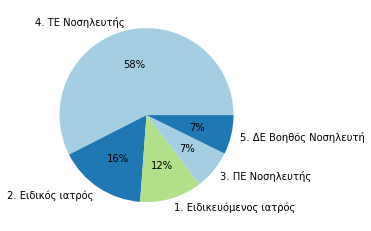

In [47]:
#plot relative_frequencies
colors = sns.color_palette("Paired", 3)

#define data
data = relative_frequencies
labels = relative_frequencies.index

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

### Analysis of Gender

In [48]:
gender = hospitals_personalInfo['1. Φύλο: ']

absolute_frequencies = gender.value_counts()
relative_frequencies = gender.value_counts(normalize=True)



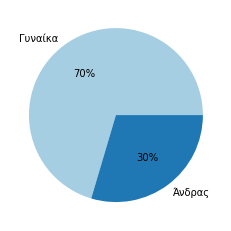

In [49]:
#plot relative_frequencies

#define data
data = relative_frequencies
labels = relative_frequencies.index

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

### Analysis of Age

In [50]:
age = hospitals_personalInfo['2. Ηλικία…']

df = age.describe()
print(df)

count     235
unique     68
top        55
freq        9
Name: 2. Ηλικία…, dtype: int64


### Analysis of Education

In [51]:
education = hospitals_personalInfo['3α. Ποια είναι η βασική σας εκπαίδευση;']

absolute_frequencies = education.value_counts()
relative_frequencies = education.value_counts(normalize=True)



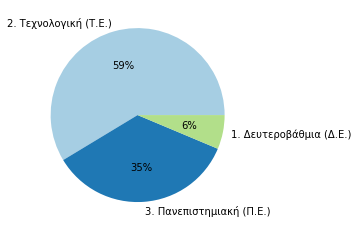

In [52]:

#define data
data = relative_frequencies
labels = relative_frequencies.index

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [53]:
%store hospitals

Stored 'hospitals' (DataFrame)
